In [28]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [14]:
# Create a set of random latitudes and longitudes (lats, lngs)
lats = np.random.uniform(low = -90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [15]:
# Store the tuple lats_lngs into a list
coordinates = list(lats_lngs)

# Initialize empty list to store city names
cities = []

# Use city.nearest_city to get the name of the nearest city for each latitude and longitude
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Check that the city name unique, if true add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Check the length of the cities list
cities[0]

'te anau'

In [18]:
# Create weather api url with api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Initialize list to store city eather data
city_data = []

# Print beginning of logging
print('Begging Data Retrieval     ')
print('---------------------------')

# Create counters
record_count = 1
set_count = 1


# Loop through all cities in cities list
for i, city in enumerate(cities):
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint url
    city_url = url + "&q=" + city.replace(" ","+")
 
    
    # Log the record number, set number, and city
    print(f'Recording {record_count} of {set_count}|{city}')
    record_count += 1
    
    # Run API request for each city
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information as a dictionary into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # Skip city on any error
    except:
        print('City not found, skipping...')
        pass
        
# Print completion statement
print('----------------------------')
print('Data Retrieval Complete     ')
print('----------------------------')
len(city_data)


Begging Data Retrieval     
---------------------------
Recording 1 of 1|te anau
Recording 2 of 1|sambava
Recording 3 of 1|nizhneyansk
City not found, skipping...
Recording 4 of 1|ushuaia
Recording 5 of 1|sassandra
Recording 6 of 1|acapulco
Recording 7 of 1|ribeira grande
Recording 8 of 1|arraial do cabo
Recording 9 of 1|rungata
City not found, skipping...
Recording 10 of 1|ignacio zaragoza
Recording 11 of 1|bilibino
Recording 12 of 1|attawapiskat
City not found, skipping...
Recording 13 of 1|tuktoyaktuk
Recording 14 of 1|okhotsk
Recording 15 of 1|atuona
Recording 16 of 1|kapaa
Recording 17 of 1|peace river
Recording 18 of 1|gigmoto
Recording 19 of 1|palmas
Recording 20 of 1|lolua
City not found, skipping...
Recording 21 of 1|kahului
Recording 22 of 1|dunedin
Recording 23 of 1|bathsheba
Recording 24 of 1|midyat
Recording 25 of 1|sioux lookout
Recording 26 of 1|vung tau
Recording 27 of 1|rikitea
Recording 28 of 1|narsaq
Recording 29 of 1|yellowknife
Recording 30 of 1|balkhash
Recording 

Recording 18 of 6|souillac
Recording 19 of 6|torbay
Recording 20 of 6|tolmachevo
Recording 21 of 6|kruisfontein
Recording 22 of 6|sieradz
Recording 23 of 6|nikolskoye
Recording 24 of 6|westport
Recording 25 of 6|norman wells
Recording 26 of 6|smithfield
Recording 27 of 6|kodiak
Recording 28 of 6|mar del plata
Recording 29 of 6|peniche
Recording 30 of 6|cockburn town
Recording 31 of 6|pacifica
Recording 32 of 6|magadan
Recording 33 of 6|nombre de dios
Recording 34 of 6|cidreira
Recording 35 of 6|inhambane
Recording 36 of 6|saleaula
City not found, skipping...
Recording 37 of 6|sorland
Recording 38 of 6|micheweni
Recording 39 of 6|kenai
Recording 40 of 6|aklavik
Recording 41 of 6|yanam
Recording 42 of 6|saint-pierre
Recording 43 of 6|bridgetown
Recording 44 of 6|ucluelet
Recording 45 of 6|kon tum
Recording 46 of 6|karmana
City not found, skipping...
Recording 47 of 6|hammerfest
Recording 48 of 6|aguas buenas
Recording 49 of 6|marcona
City not found, skipping...
Recording 50 of 6|kirakira

City not found, skipping...
Recording 44 of 11|guangshui
Recording 45 of 11|millinocket
Recording 46 of 11|kopyevo
City not found, skipping...
Recording 47 of 11|kifri
Recording 48 of 11|bur gabo
City not found, skipping...
Recording 49 of 11|mgachi
Recording 50 of 11|saint-joseph
Recording 1 of 12|moerai
Recording 2 of 12|belaya gora
Recording 3 of 12|barrhead
Recording 4 of 12|lingyuan
Recording 5 of 12|lagos
Recording 6 of 12|palmer
Recording 7 of 12|bilma
Recording 8 of 12|zyryanka
Recording 9 of 12|charters towers
Recording 10 of 12|muros
Recording 11 of 12|halalo
City not found, skipping...
Recording 12 of 12|porto walter
Recording 13 of 12|ponta do sol
Recording 14 of 12|lazaro cardenas
Recording 15 of 12|muisne
Recording 16 of 12|antalaha
Recording 17 of 12|belyy yar
Recording 18 of 12|bemidji
Recording 19 of 12|rodrigues alves
Recording 20 of 12|asau
Recording 21 of 12|abaca
Recording 22 of 12|provideniya
Recording 23 of 12|kozulka
Recording 24 of 12|kushiro
Recording 25 of 12

595

In [23]:
# Convert city data list to dataframe
city_data_df = pd.DataFrame(city_data)

# Create a list and reorder columns in city_data_df
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

# Save city_data_df as csv in weather_data folder
output_file_path = 'weather_data\cities.csv'
city_data_df.to_csv(output_file_path, index_label='City_ID')

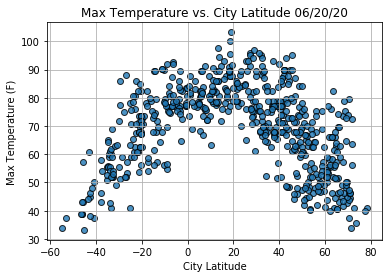

In [30]:
# Extract relevant city data for plotting
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Build scatter plot Max Temperature vs. latitude
plt.scatter(lat, 
            max_temp, 
            edgecolor='black', linewidth=1, marker='o', 
            alpha=0.8, 
            label='Cities')

# Incorporate other graph properties
plt.title(f'Max Temperature vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.grid(True)

# Save the figure to file and display the plot inline
plt.savefig('weather_data\Fig1.png')
plt.show()

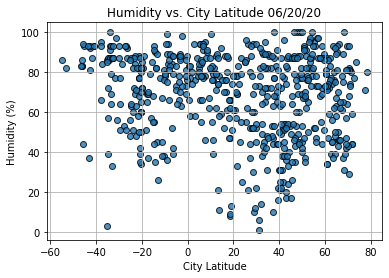

In [31]:
# Build scatter plot Humidity vs. latitude
plt.scatter(lat, 
            humidity, 
            edgecolor='black', linewidth=1, marker='o', 
            alpha=0.8, 
            label='Cities')

# Incorporate other graph properties
plt.title(f'Humidity vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('City Latitude')
plt.grid(True)

# Save the figure to file and display the plot inline
plt.savefig('weather_data\Fig2.png')
plt.show()

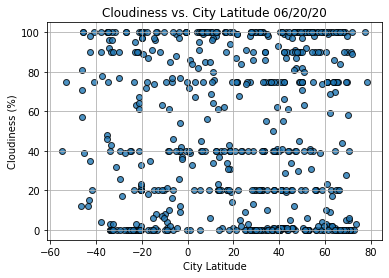

In [32]:
# Build scatter plot cloudiness vs. latitude
plt.scatter(lat, 
            cloudiness, 
            edgecolor='black', linewidth=1, marker='o', 
            alpha=0.8, 
            label='Cities')

# Incorporate other graph properties
plt.title(f'Cloudiness vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('City Latitude')
plt.grid(True)

# Save the figure to file and display the plot inline
plt.savefig('weather_data\Fig3.png')
plt.show()

In [ ]:
# Build scatter plot Max Temperature vs. latitude
plt.scatter(lat, 
            wind_speed, 
            edgecolor='black', linewidth=1, marker='o', 
            alpha=0.8, 
            label='Cities')

# Incorporate other graph properties
plt.title(f'M vs. City Latitude ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('City Latitude')
plt.grid(True)

# Save the figure to file and display the plot inline
plt.savefig('weather_data\Fig1.png')
plt.show()